In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/ul-pfe-ns.csv')

In [3]:
# df.columns

In [4]:
# df.head()

In [5]:
df.shape

(1972, 80)

In [6]:
# df.info()

In [7]:
X = df.drop('throughput',axis=1)

In [8]:
X.shape

(1972, 79)

In [9]:
y = df['throughput']

In [10]:
y.shape

(1972,)

In [11]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Scale the data
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [12]:
mae

2.813826310752688

In [13]:
mse

16.71426492824455

In [14]:
rmse

4.088308321083985

In [15]:
err_df = pd.DataFrame(data=[mae, mse, rmse],index=['MAE','MSE','RMSE'],columns=['RF'])
err_df

,RF
MAE,2.813826
MSE,16.714265
RMSE,4.088308


In [16]:
err_df.to_csv('./baseline-test-err/rf-def-test-err.csv')

In [17]:
y_pred_df = pd.DataFrame(y_pred, columns=['throughput_pred'])
y_pred_df.describe().drop('count')
# no negative predictions

,throughput_pred
mean,18.117081
std,8.176993
min,3.138116
25%,11.403461
50%,18.911166
75%,25.364245
max,33.454141


<AxesSubplot:ylabel='Count'>

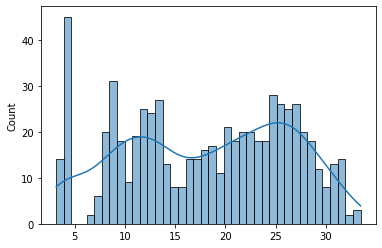

In [18]:
sns.histplot(y_pred,bins=40,kde=True)
# the distribution better reflects the true distribution of the data set

In [19]:
# y.describe().drop(['count'])

In [20]:
res = y_test - y_pred
res.describe().drop('count')

mean     0.048735
std      4.091161
min    -22.456340
25%     -1.708737
50%      0.199286
75%      2.026879
max     21.167689
Name: throughput, dtype: float64

Text(0.5, 0, 'Residuals')

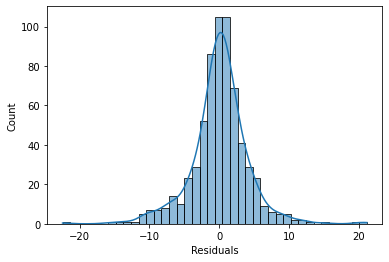

In [21]:
sns.histplot(data=res, kde=True,bins=40)
plt.xlabel('Residuals')

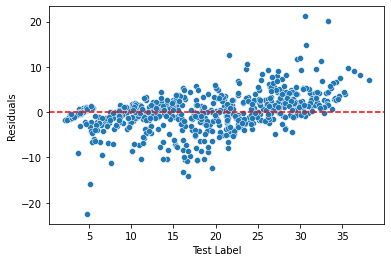

In [22]:
ax = sns.scatterplot(x=y_test, y=res)
ax.set(ylabel='Residuals', xlabel='Test Label')
plt.axhline(y=0,color='red',linestyle='--')

# there should be no clear pattern / curve in the plot
# we see a positive correlation between Test Label and Residuals -> later models should avoid this pattern

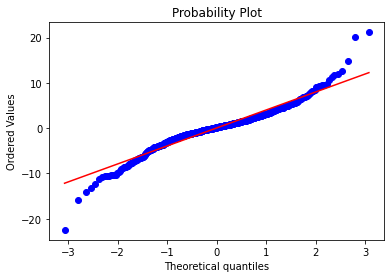

In [23]:
import scipy as sp

fig, ax = plt.subplots()
sp.stats.probplot(res,plot=ax);

In [24]:
# Scale the data
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X)

X_rf = scaler.transform(X)

rf_model = RandomForestRegressor()
rf_model.fit(X_rf,y)

RandomForestRegressor()

In [25]:
# model.coef_

In [26]:
# coef_df = pd.DataFrame(data=model.coef_,index=X.columns,columns=['beta'])
# coef_df

In [27]:
# rf_model.coef_

In [28]:
# coef_df = pd.DataFrame(data=rf_model.coef_,index=X.columns,columns=['beta'])
# coef_df

In [29]:
# delta_df = pd.DataFrame(data=rf_model.coef_ - model.coef_,index=X.columns,columns=['delta_beta'])
# delta_df

In [30]:
# pd.set_option('display.max_columns',None)
# delta_df.sort_values('delta_beta').sort_values('delta_beta').transpose()

In [31]:
# sns.histplot(data=delta_df,bins=40,kde=True)

In [32]:
y_pred_rf = rf_model.predict(X_rf)

<AxesSubplot:ylabel='Count'>

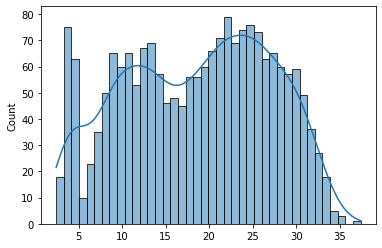

In [33]:
sns.histplot(y_pred_rf,bins=40,kde=True)

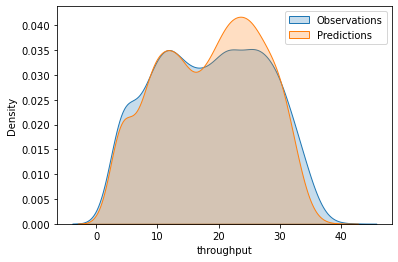

In [34]:
fig,ax = plt.subplots()

sns.kdeplot(y, ax=ax, shade=True, label='Observations')
sns.kdeplot(y_pred_rf, ax=ax,shade=True,label='Predictions')

ax.legend(loc='best')

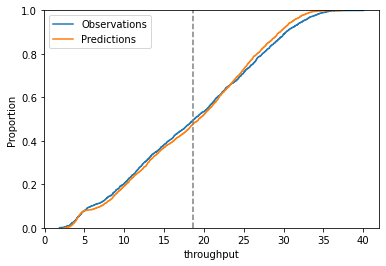

In [35]:
fig,ax = plt.subplots()

sns.ecdfplot(y, ax=ax, label='Observations')
sns.ecdfplot(y_pred_rf, ax=ax,label='Predictions')
plt.axvline(x=y.mean(),color='grey',linestyle='--')

ax.legend(loc='best')

In [36]:
mae = mean_absolute_error(y,y_pred_rf)
mse = mean_squared_error(y,y_pred_rf)
rmse = np.sqrt(mse)

In [37]:
err_df = pd.DataFrame(data=[mae, mse, rmse],index=['MAE','MSE','RMSE'],columns=['RF'])
err_df

,RF
MAE,1.007010
MSE,2.049224
RMSE,1.431511


In [38]:
err_df.to_csv('./model-err/rf-def-err.csv')

In [39]:
from joblib import dump, load
dump(rf_model, './baseline-models/rf-def-model.joblib')

['./baseline-models/rf-def-model.joblib']

DONE!